# Zomato Restaurant Data Analysis

In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Import necessary libraries for data manipulation, visualization, and numerical operations

In [164]:
from google.colab import drive
drive.mount('/content/drive')
# Mount Google Drive to access files

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Project Goals
The primary goals of this project are to analyze the Zomato restaurant data to understand various aspects of the restaurant landscape in Bangalore. This includes identifying popular restaurant types and locations, examining the relationship between online ordering/table booking and restaurant characteristics, and exploring factors influencing restaurant ratings and costs

In [165]:
df=pd.read_csv(r'/content/drive/MyDrive/zomato.csv', encoding='utf-8')
df.head()
# Load the dataset from Google Drive and display the first few rows

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [166]:
df.info()
# Display information about the DataFrame, including data types and non-null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [167]:
df.columns
# Display the column names of the DataFrame

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [168]:
df = df.drop(['address','phone','dish_liked','listed_in(city)','cuisines',"reviews_list","menu_item"], axis=1)
df
# Drop irrelevant columns from the DataFrame

,url,name,online_order,book_table,rate,votes,location,rest_type,approx_cost(for two people),listed_in(type)
0,https://www.zomato.com/bangalore/jalsa-banasha...,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,800,Buffet
1,https://www.zomato.com/bangalore/spice-elephan...,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,800,Buffet
2,https://www.zomato.com/SanchurroBangalore?cont...,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining",800,Buffet
3,https://www.zomato.com/bangalore/addhuri-udupi...,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,300,Buffet
4,https://www.zomato.com/bangalore/grand-village...,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,600,Buffet
...,...,...,...,...,...,...,...,...,...,...
51712,https://www.zomato.com/bangalore/best-brews-fo...,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,Whitefield,Bar,"1,500",Pubs and bars
51713,https://www.zomato.com/bangalore/vinod-bar-and...,Vinod Bar And Restaurant,No,No,NaN,0,Whitefield,Bar,600,Pubs and bars
51714,https://www.zomato.com/bangalore/plunge-sherat...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,Whitefield,Bar,"2,000",Pubs and bars
51715,https://www.zomato.com/bangalore/chime-sherato...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,"ITPL Main Road, Whitefield",Bar,"2,500",Pubs and bars


In [169]:
df['rate'].unique()
# Display unique values in the 'rate' column

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [170]:
float('4.1'.split('/')[0])
# Example of splitting the 'rate' string to extract the numerical part

4.1

In [171]:
def cleaning_rate(value):
  if (value == 'NEW' or value == '-'):
    return np.nan
  else:
    return float(str(value).split('/')[0])
# Define a function to clean the 'rate' column by converting 'NEW' and '-' to NaN and extracting the numerical value

In [172]:
df['rate']=df['rate'].apply(cleaning_rate)
df['rate'].unique()
# Apply the cleaning_rate function to the 'rate' column and display unique values

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, nan, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

In [173]:
df.isna().sum()
# Check for missing values in each column

,0
url,0
name,0
online_order,0
book_table,0
rate,10052
votes,0
location,21
rest_type,227
approx_cost(for two people),346
listed_in(type),0


In [174]:
df["rate"] = df["rate"].fillna(np.round(df['rate'].mean(),1))
# Fill missing values in the 'rate' column with the rounded mean of the column

In [175]:
df.isna().sum()
# Check for missing values after filling the 'rate' column

,0
url,0
name,0
online_order,0
book_table,0
rate,0
votes,0
location,21
rest_type,227
approx_cost(for two people),346
listed_in(type),0


In [176]:
df = df.dropna()
# Drop rows with any remaining missing values

In [177]:
df
# Display the DataFrame after dropping missing values

,url,name,online_order,book_table,rate,votes,location,rest_type,approx_cost(for two people),listed_in(type)
0,https://www.zomato.com/bangalore/jalsa-banasha...,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,800,Buffet
1,https://www.zomato.com/bangalore/spice-elephan...,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,800,Buffet
2,https://www.zomato.com/SanchurroBangalore?cont...,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining",800,Buffet
3,https://www.zomato.com/bangalore/addhuri-udupi...,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,300,Buffet
4,https://www.zomato.com/bangalore/grand-village...,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,600,Buffet
...,...,...,...,...,...,...,...,...,...,...
51712,https://www.zomato.com/bangalore/best-brews-fo...,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6,27,Whitefield,Bar,"1,500",Pubs and bars
51713,https://www.zomato.com/bangalore/vinod-bar-and...,Vinod Bar And Restaurant,No,No,3.7,0,Whitefield,Bar,600,Pubs and bars
51714,https://www.zomato.com/bangalore/plunge-sherat...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,3.7,0,Whitefield,Bar,"2,000",Pubs and bars
51715,https://www.zomato.com/bangalore/chime-sherato...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3,236,"ITPL Main Road, Whitefield",Bar,"2,500",Pubs and bars


In [178]:
df.duplicated().sum()
# Check for duplicate rows in the DataFrame

np.int64(0)

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51167 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   url                          51167 non-null  object 
 1   name                         51167 non-null  object 
 2   online_order                 51167 non-null  object 
 3   book_table                   51167 non-null  object 
 4   rate                         51167 non-null  float64
 5   votes                        51167 non-null  int64  
 6   location                     51167 non-null  object 
 7   rest_type                    51167 non-null  object 
 8   approx_cost(for two people)  51167 non-null  object 
 9   listed_in(type)              51167 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 4.3+ MB


In [180]:
df['approx_cost(for two people)'].unique()
# Display unique values in the 'approx_cost(for two people)' column

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [181]:
def cleaned_cost(value):
  value=str(value)
  if ',' in value:
    value = value.replace(',','')
    return float(value)
  else:
    return float(value)
# Define a function to clean the 'approx_cost(for two people)' column by removing commas and converting to float

In [182]:
df['approx_cost(for two people)']=df['approx_cost(for two people)'].apply(cleaned_cost)
df
# Apply the cleaned_cost function to the 'approx_cost(for two people)' column and display the DataFrame

/tmp/ipython-input-1413764239.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['approx_cost(for two people)']=df['approx_cost(for two people)'].apply(cleaned_cost)


,url,name,online_order,book_table,rate,votes,location,rest_type,approx_cost(for two people),listed_in(type)
0,https://www.zomato.com/bangalore/jalsa-banasha...,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,800.0,Buffet
1,https://www.zomato.com/bangalore/spice-elephan...,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,800.0,Buffet
2,https://www.zomato.com/SanchurroBangalore?cont...,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining",800.0,Buffet
3,https://www.zomato.com/bangalore/addhuri-udupi...,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,300.0,Buffet
4,https://www.zomato.com/bangalore/grand-village...,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,600.0,Buffet
...,...,...,...,...,...,...,...,...,...,...
51712,https://www.zomato.com/bangalore/best-brews-fo...,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6,27,Whitefield,Bar,1500.0,Pubs and bars
51713,https://www.zomato.com/bangalore/vinod-bar-and...,Vinod Bar And Restaurant,No,No,3.7,0,Whitefield,Bar,600.0,Pubs and bars
51714,https://www.zomato.com/bangalore/plunge-sherat...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,3.7,0,Whitefield,Bar,2000.0,Pubs and bars
51715,https://www.zomato.com/bangalore/chime-sherato...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3,236,"ITPL Main Road, Whitefield",Bar,2500.0,Pubs and bars


In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51167 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   url                          51167 non-null  object 
 1   name                         51167 non-null  object 
 2   online_order                 51167 non-null  object 
 3   book_table                   51167 non-null  object 
 4   rate                         51167 non-null  float64
 5   votes                        51167 non-null  int64  
 6   location                     51167 non-null  object 
 7   rest_type                    51167 non-null  object 
 8   approx_cost(for two people)  51167 non-null  float64
 9   listed_in(type)              51167 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 4.3+ MB


In [184]:
df['approx_cost(for two people)'].unique()
# Display unique values in the 'approx_cost(for two people)' column after cleaning

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130.,   50.,  190., 1700., 1400.,  180., 1350., 2200.,
       2000., 1800., 1900.,  330., 2500., 2100., 3000., 2800., 3400.,
         40., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,  469.,
         70., 3200.,   60.,  560.,  240.,  360., 6000., 1050., 2300.,
       4100., 5000., 3700., 1650., 2700., 4500.,  140.])

In [185]:
restaurant_type=df['rest_type'].value_counts()

In [186]:
type_below_500 = restaurant_type[restaurant_type<500]
# Identify restaurant types with counts below 500

In [187]:
def cleaned_type(value):
  if(value in type_below_500):
    return 'Others'
  else:
    return value
# Define a function to group less frequent restaurant types into 'Others'

In [188]:
df['rest_type']=df['rest_type'].apply(cleaned_type)
df['rest_type'].value_counts()
# Apply the cleaned_type function to the 'rest_type' column and display the counts

/tmp/ipython-input-3303881557.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rest_type']=df['rest_type'].apply(cleaned_type)


,count
rest_type,
Quick Bites,19048
Casual Dining,10275
Others,6860
Cafe,3687
Delivery,2587
Dessert Parlor,2245
"Takeaway, Delivery",2016
Bakery,1141
"Casual Dining, Bar",1136


In [189]:
res_location = df['location'].value_counts()
loc_below_200 = res_location[res_location < 200]
loc_below_200
# Get the counts of each location and identify locations with counts below 200

,count
location,
Kumaraswamy Layout,194
Thippasandra,191
Nagawara,187
Basaveshwara Nagar,187
Seshadripuram,165
Hennur,159
Majestic,155
HBR Layout,153
Infantry Road,151


In [190]:
def cleaning_location(value):
  if value in loc_below_200:
    return 'other'
  elif 'Koramangala' in value:
    return 'Koramangala'
  else:
    return value
# Define a function to group less frequent locations into 'other' and consolidate Koramangala locations

In [191]:
df['location']=df['location'].apply(cleaning_location)
df['location'].value_counts()
# Apply the cleaning_location function to the 'location' column and display the counts

/tmp/ipython-input-2800383306.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location']=df['location'].apply(cleaning_location)


,count
location,
Koramangala,7550
BTM,5071
other,3412
HSR,2496
JP Nagar,2219
Whitefield,2117
Indiranagar,2033
Jayanagar,1916
Marathahalli,1811


restaurant delivering online order or not

Text(0.5, 1.0, 'Restaurant delivering online order or not')

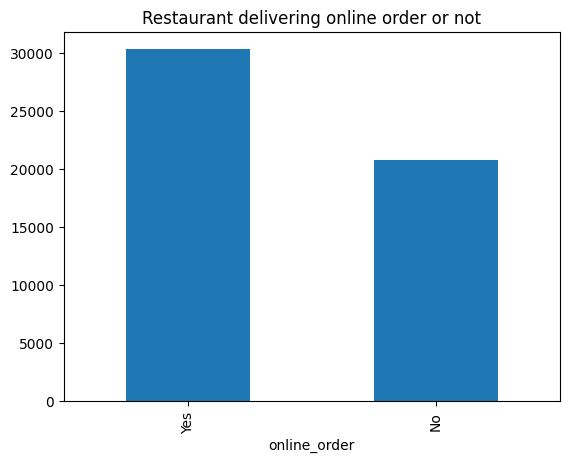

In [192]:
df['online_order'].value_counts().plot(kind='bar')
plt.title('Restaurant delivering online order or not')

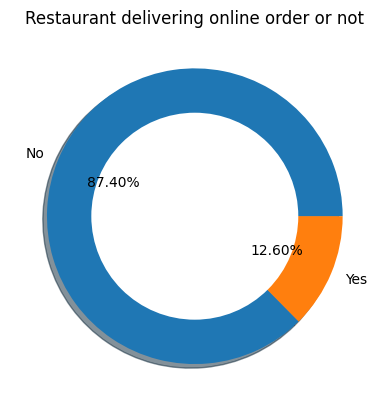

In [193]:
plt.pie(df['book_table'].value_counts().values,labels=df['book_table'].value_counts().index,
        autopct='%1.2f%%',shadow = True)
centre_circle=plt.Circle((0,0),0.7,fc="white")
fig = plt.gcf()

fig.gca().add_artist(centre_circle)
plt.title('Restaurant delivering online order or not')
plt.show()

In [194]:
df['book_table'].value_counts() #index
# Get the counts of restaurants offering table booking

,count
book_table,
No,44718
Yes,6449


<Axes: ylabel='location'>

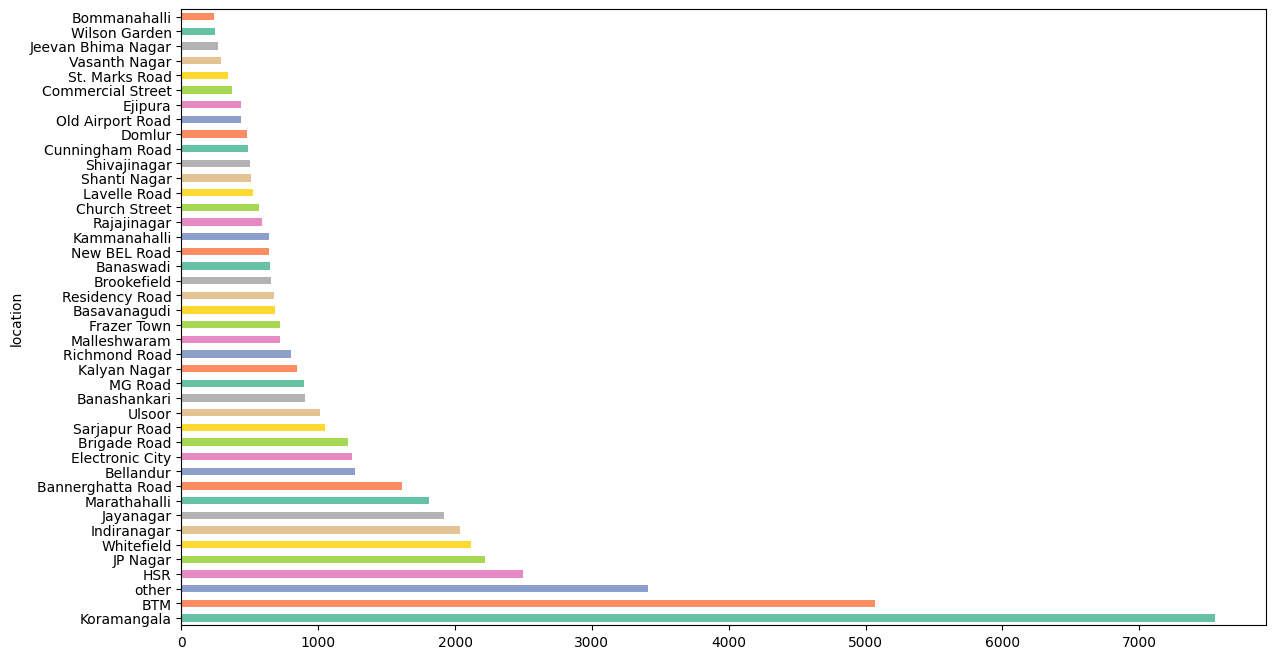

In [195]:
plt.figure(figsize=(14,8))
df['location'].value_counts().plot(kind='barh',color=sns.color_palette('Set2'))
# Create a horizontal bar plot of restaurant counts by location

In [196]:
res_cost = df['approx_cost(for two people)'].groupby(df['name'],sort=True)
# Group the DataFrame by restaurant name and select the 'approx_cost(for two people)' column

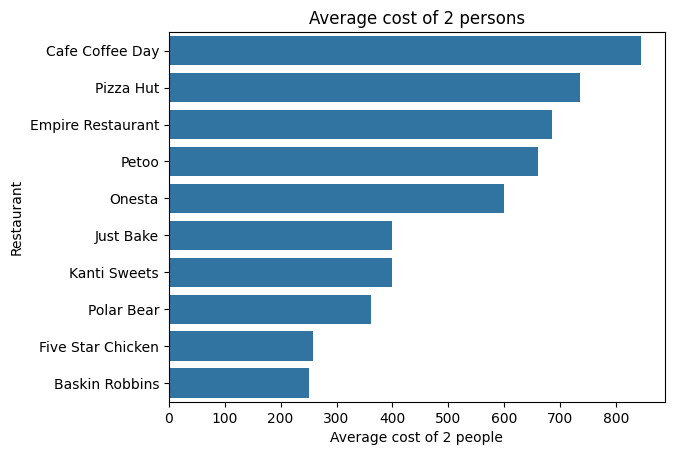

In [197]:
dict1={}

for i,j in df['name'].value_counts()[:10].to_dict().items():
  dict1[i]=np.round(df.groupby('name')['approx_cost(for two people)'].get_group(i).mean(),2)

cost_df = pd.DataFrame(list(dict1.items()),columns=['Restaurant', "Average cost of 2 people"])
sns.barplot(data=cost_df.sort_values(by='Average cost of 2 people',ascending=False),
             x="Average cost of 2 people",y="Restaurant")

plt.title("Average cost of 2 persons")
plt.show()
# Calculate the average cost for the top 10 most frequent restaurants and visualize as a bar plot

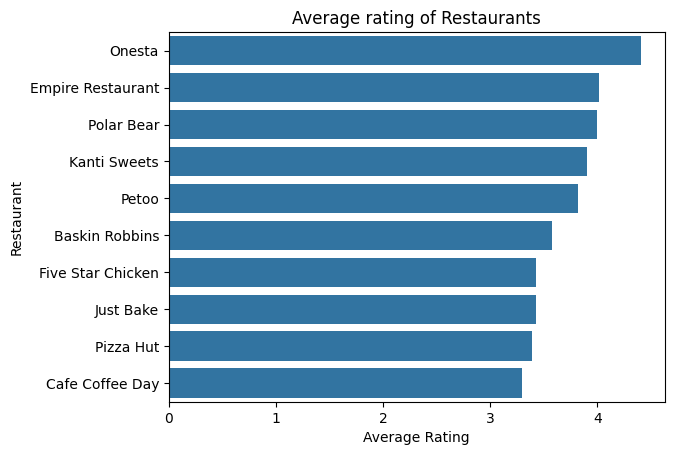

In [198]:
dict2={}

for i,j in df['name'].value_counts()[:10].to_dict().items():
  dict2[i]=np.round(df.groupby('name')['rate'].get_group(i).mean(),2)

rate_df = pd.DataFrame(list(dict2.items()),columns=['Restaurant', "Average Rating"])
sns.barplot(data=rate_df.sort_values(by='Average Rating',ascending=False),
             x="Average Rating",y="Restaurant")
plt.title("Average rating of Restaurants")
plt.show()
# Calculate the average rating for the top 10 most frequent restaurants and visualize as a bar plot


## Analysis Performed
So far, the analysis has involved:
- Loading and inspecting the dataset.
- Handling missing values in the 'rate', 'location', and 'rest_type' columns.
- Cleaning and converting the 'approx_cost(for two people)' column to a numerical format.
- Grouping less frequent restaurant types and locations into 'Others' and 'other' categories respectively for better visualization and analysis.
- Visualizing the proportion of restaurants offering online ordering and table booking.
- Visualizing the distribution of restaurants across different locations.
- Analyzing the average cost and average rating for the top 10 most frequent restaurants.

## Key Results and Observations
Based on the analysis conducted thus far, some key observations include:
- A significant number of restaurants offer online ordering, while a much smaller proportion allows table booking.
- Certain locations like Koramangala and BTM have a high concentration of restaurants.
- Among the top 10 most frequent restaurants, there is variation in both average cost and average rating, suggesting that popularity doesn't always directly correlate with the highest ratings or costs.